In [1]:
import csv
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

from sklearn import svm
from sklearn.datasets import samples_generator
from sklearn.feature_selection import SelectKBest, f_regression, SelectPercentile, f_classif
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report



### Importing Pickles


In [2]:
madelon_df_sample1 = pd.read_pickle(('../pickle_jar/madelon_df_sample1.p'))

In [3]:
DB_features = pd.read_pickle('../pickle_jar/DB_features.p')  ###pickled DF from 1st sample

In [18]:
madelon_df_sample3 = pd.read_pickle('../pickle_jar/madelonDB_df_3.p')

In [22]:
DB_target = madelon_df_sample3['target']
DB_target.to_pickle('../pickle_jar/DB_target.p')


In [28]:
DB_target.shape

(6506,)

In [ ]:
DB_target = pd.read_pickle('../pickle_jar/DB_target.p')

In [27]:
madelon_df_sample3.head()

,feat_000,feat_001,feat_002,feat_003,feat_004,feat_005,feat_006,feat_007,feat_008,feat_009,...,feat_990,feat_991,feat_992,feat_993,feat_994,feat_995,feat_996,feat_997,feat_998,feat_999
0,0.100703,0.006181,-0.931539,-0.249291,-1.368559,-1.045846,-0.024266,0.215123,1.972021,-0.629383,...,-0.832622,-1.262137,-0.460860,-0.116376,1.012621,-0.643382,-2.512907,1.470081,0.967515,-1.009679
1,-1.614689,1.487478,0.104997,-0.299256,0.714779,0.948342,-2.342655,-0.054022,-0.637273,-0.357148,...,2.351854,1.044117,0.399537,-1.645515,-0.102974,1.311227,-0.209919,-1.559430,0.655316,-0.354343
2,-0.233230,0.502393,0.358158,-1.209939,-1.447468,-1.867942,3.060520,-0.367064,0.555851,-1.070533,...,-0.148026,-0.472226,-0.858670,0.838144,-0.555115,-0.729012,0.861242,-1.472961,-0.340525,-1.513942
3,0.223031,1.618666,-0.840131,-1.636135,-2.181920,-0.377066,-1.433182,-0.921207,-1.393196,-0.998401,...,0.425704,-0.229525,-0.746253,-1.105916,-2.184082,-1.590268,0.535766,0.160519,0.215458,1.028397
4,2.018618,0.082708,-1.626162,0.619570,-1.511208,-0.486179,-1.390963,-1.067104,-1.651090,1.268769,...,-0.761905,-0.843724,0.075827,-0.560205,0.897533,1.039392,0.306660,-0.943689,-0.241055,-2.173672


### Feature Importance

In [30]:
madelon_df_sample3.head()

,feat_000,feat_001,feat_002,feat_003,feat_004,feat_005,feat_006,feat_007,feat_008,feat_009,...,feat_990,feat_991,feat_992,feat_993,feat_994,feat_995,feat_996,feat_997,feat_998,feat_999
0,0.100703,0.006181,-0.931539,-0.249291,-1.368559,-1.045846,-0.024266,0.215123,1.972021,-0.629383,...,-0.832622,-1.262137,-0.460860,-0.116376,1.012621,-0.643382,-2.512907,1.470081,0.967515,-1.009679
1,-1.614689,1.487478,0.104997,-0.299256,0.714779,0.948342,-2.342655,-0.054022,-0.637273,-0.357148,...,2.351854,1.044117,0.399537,-1.645515,-0.102974,1.311227,-0.209919,-1.559430,0.655316,-0.354343
2,-0.233230,0.502393,0.358158,-1.209939,-1.447468,-1.867942,3.060520,-0.367064,0.555851,-1.070533,...,-0.148026,-0.472226,-0.858670,0.838144,-0.555115,-0.729012,0.861242,-1.472961,-0.340525,-1.513942
3,0.223031,1.618666,-0.840131,-1.636135,-2.181920,-0.377066,-1.433182,-0.921207,-1.393196,-0.998401,...,0.425704,-0.229525,-0.746253,-1.105916,-2.184082,-1.590268,0.535766,0.160519,0.215458,1.028397
4,2.018618,0.082708,-1.626162,0.619570,-1.511208,-0.486179,-1.390963,-1.067104,-1.651090,1.268769,...,-0.761905,-0.843724,0.075827,-0.560205,0.897533,1.039392,0.306660,-0.943689,-0.241055,-2.173672


In [ ]:
feature_list = []
for i in DB_features.index:
    feature_list.append(i)

feature_list

In [31]:
DB_trimmed_df3 = madelon_df_sample3.loc[:, feature_list]
DB_trimmed_df3.shape

(6506, 20)

In [32]:
DB_trimmed_df3.head()

,feat_639,feat_956,feat_341,feat_315,feat_867,feat_269,feat_336,feat_395,feat_701,feat_724,feat_257,feat_526,feat_769,feat_829,feat_920,feat_736,feat_808,feat_504,feat_681,feat_308
0,0.660916,1.088752,1.188703,-0.515358,0.955454,1.101862,-0.075655,-1.403369,-1.120387,0.477059,1.538805,0.110727,-0.311059,2.449488,-2.098730,-1.308329,-0.473198,-0.056173,1.334591,2.122377
1,-3.165634,-2.523248,-5.627815,0.661298,4.071490,-1.842153,-5.979303,-4.490868,-2.609116,2.173005,-0.594964,3.090302,4.475702,-1.123622,-1.925724,-4.241024,1.926215,-0.142134,-1.204221,1.903192
2,-0.343109,-0.621201,-2.602240,-0.549913,-0.136897,-3.181469,-1.688440,-0.219289,2.005632,0.186641,-1.204416,-0.236597,1.644917,-2.236824,1.470112,-0.885454,1.530122,1.143919,-2.159218,-0.487422
3,1.353230,0.833855,0.134574,-0.190346,-0.852043,-1.593220,1.094138,0.395046,0.947323,0.447420,0.610367,0.130765,1.223934,1.354489,0.095909,0.823544,-0.200368,1.967008,-2.256630,-1.562784
4,-3.097087,-2.029956,-6.348887,-1.210703,1.537945,-2.622201,-3.810353,-5.264516,-0.340054,4.948624,0.610158,2.813066,3.107586,-2.873155,1.047722,-3.454296,-0.341100,-3.458921,0.777129,0.920890


In [33]:
DB_trimmed_df3.to_pickle('../pickle_jar/DB_trimmed_df3.p')

In [36]:
DB_trimmed_df3 = pd.read_pickle('../pickle_jar/DB_trimmed_df3.p')

In [14]:
DB_trimmed_df.to_pickle('../pickle_jar/DB_trimmed_df.p')

In [ ]:
DB_trimmed_df = pd.read_pickle('../pickle_jar/DB_trimmed_df.p')

### Heatmap of Trimmed DF.    

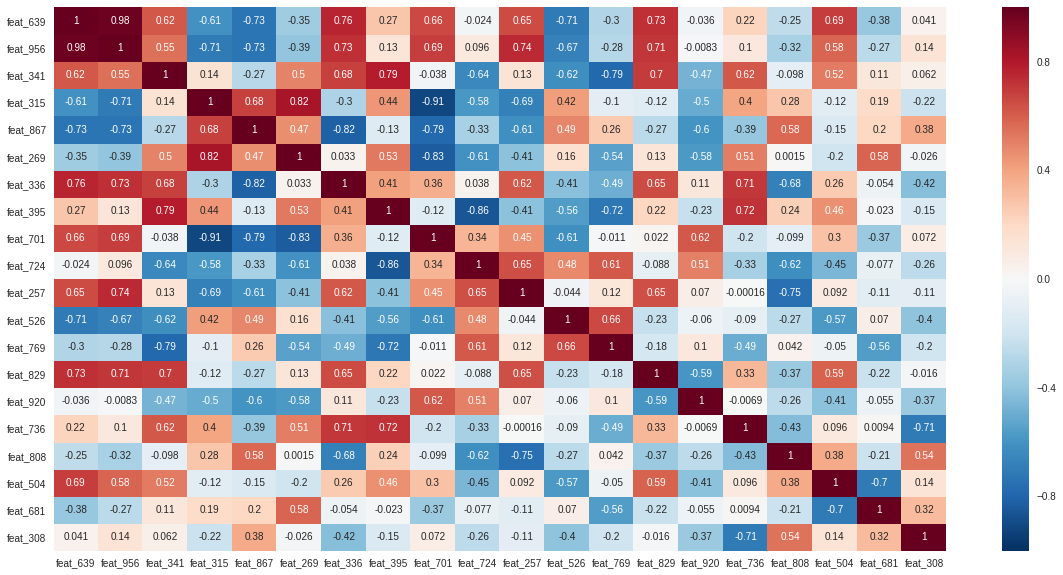

In [15]:
fig = plt.figure(figsize = (20,10))
sns.heatmap(DB_trimmed_df.corr(), annot=True)  #choose vlaues closest to +1 or-1 for correlation

- Unlike the heatmap from the UCI dataset, we do not see much correlation here.
    - feat_639 and feat_956 seem to be a pair

### One-way ANOVA Feature Selection Using SelectKBest

In [34]:
X = DB_trimmed_df3
y = DB_target

<Container object of 20 artists>

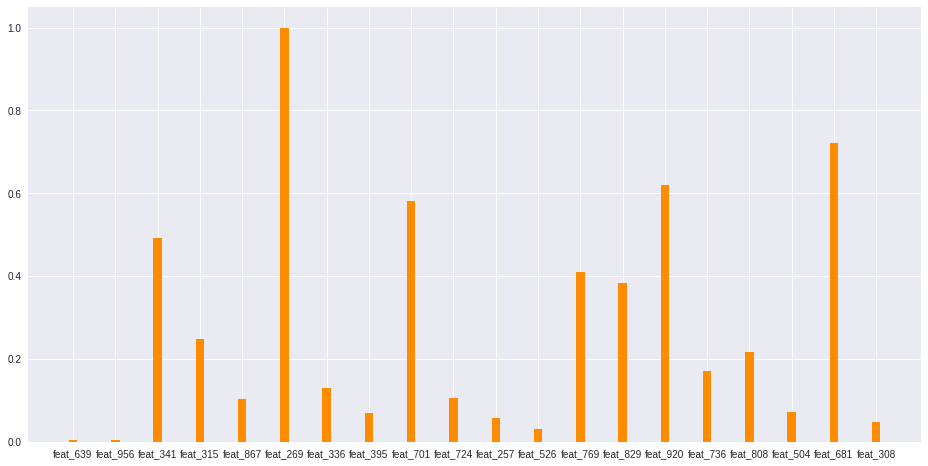

In [35]:
fig = plt.figure(figsize=(16,8))
X_indices = np.arange(X.shape[-1])
selector = SelectPercentile(f_classif, percentile=10)
selector.fit(X, y)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
plt.bar(X_indices - .45, scores, width=.2, tick_label=X.columns,
        label=r'Univariate score ($-Log(p_{value})$)', color='darkorange')